# Building a clustering model with tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)

# Apply K-means clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_train)
labels = kmeans.labels_

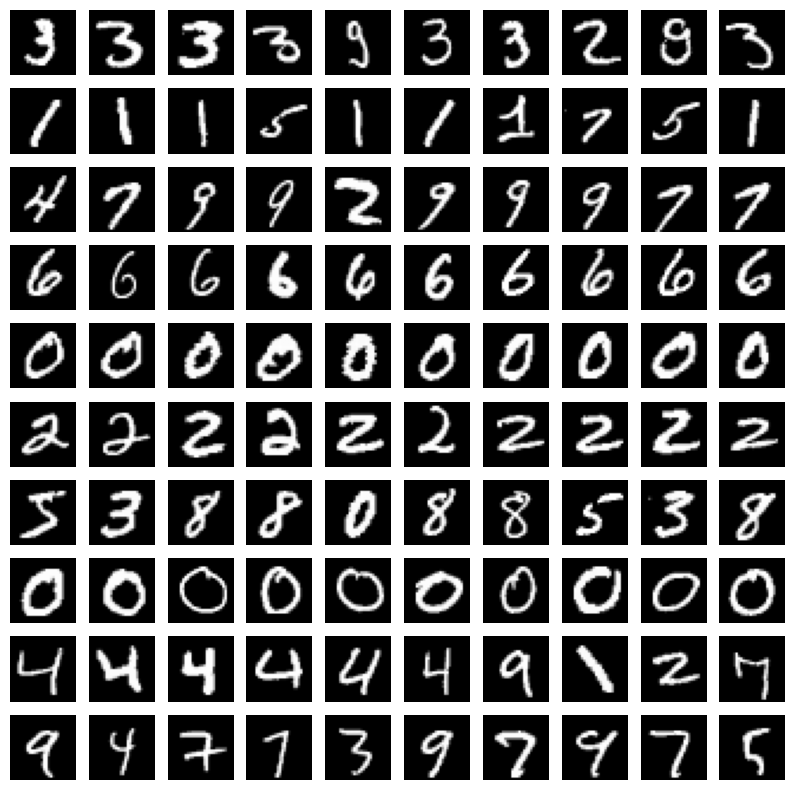

In [3]:
# Display a few clustered images
def display_cluster_images(x_train, labels):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        idxs = np.where(labels == i)[0]
        for j in range(10):
            plt_idx = i * 10 + j + 1
            plt.subplot(10, 10, plt_idx)
            plt.imshow(x_train[idxs[j]].reshape(28, 28), cmap='gray')
            plt.axis('off')
    plt.show()

display_cluster_images(x_train, labels)

# Building a dimensinality reduction model with TensorFlow

In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the autoencoder model
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
bottleneck = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_split=0.2)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3878 - val_loss: 0.1874
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1783 - val_loss: 0.1557
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1505 - val_loss: 0.1398
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1362 - val_loss: 0.1306
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1278 - val_loss: 0.1237
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1217 - val_loss: 0.1189
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1174 - val_loss: 0.1161
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1144 - val_loss: 0.1126
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1109 - val_loss: 0.1095
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1083 - val_loss: 0.1070
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1058 - val_loss: 0.1052
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step


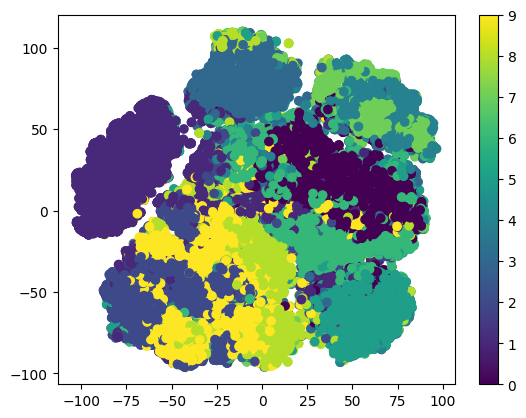

In [5]:
from sklearn.manifold import TSNE

# Get the compressed representations
encoder = Model(input_layer, bottleneck)
compressed_data = encoder.predict(x_train)

# Use t-SNE for 2D visualization
tsne = TSNE(n_components=2)
compressed_2d = tsne.fit_transform(compressed_data)

# Plot the compressed data
plt.scatter(compressed_2d[:, 0], compressed_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()